In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




import warnings

from sklearn import linear_model

warnings.filterwarnings('ignore')

capture_site = pd.read_csv('data/CaptureSite_category.csv')

In [2]:
capture_site

,CaptureSite,CaptureSiteCategory,Type
0,CaptureSite_0,CaptureSiteCategory_2,Type_1
1,CaptureSite_1,CaptureSiteCategory_2,Type_1
2,CaptureSite_10,CaptureSiteCategory_2,Type_1
3,CaptureSite_11,CaptureSiteCategory_0,Type_0
4,CaptureSite_12,CaptureSiteCategory_2,Type_1
5,CaptureSite_13,CaptureSiteCategory_2,Type_1
6,CaptureSite_14,CaptureSiteCategory_4,Type_0
7,CaptureSite_15,CaptureSiteCategory_0,Type_0
8,CaptureSite_16,CaptureSiteCategory_4,Type_0
9,CaptureSite_17,CaptureSiteCategory_4,Type_0


In [3]:
sample_sub = pd.read_csv('data/Sample_sub.csv')

In [4]:
sample_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              1276 non-null   object
 1   Capture_Number  1276 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.1+ KB


In [5]:
sample_sub.groupby('ID').count()

,Capture_Number
ID,
CaptureSite_0_201901,1
CaptureSite_0_201902,1
CaptureSite_0_201903,1
CaptureSite_0_201904,1
CaptureSite_0_201905,1
...,...
CaptureSite_9_201940,1
CaptureSite_9_201941,1
CaptureSite_9_201942,1


In [6]:
train_df = pd.read_csv('data/train.csv')

In [7]:
train_df.head()


,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,NaN,NaN,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,NaN,NaN,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,NaN,NaN,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,NaN,NaN,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,NaN,NaN,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02


In [8]:
import pandas as pd
import re

# Standartising column names 
def standardize_column_names(col):
    # Replace spaces with underscores
    col = col.replace(' ', '_')
    # Insert underscore before each uppercase letter preceded by a lowercase letter or followed by a lowercase letter
    col = re.sub(r'(?<=[a-z])(?=[A-Z])', '_', col)
    col = re.sub(r'(?<=[A-Z])(?=[A-Z][a-z])', '_', col)
    # Convert to lower case
    col = col.lower()
    # Ensure single underscores only (in case of consecutive underscores from initial spaces)
    col = re.sub(r'_+', '_', col)
    return col

train_df.columns = [standardize_column_names(col) for col in train_df.columns]

# Printing the updated column names to verify the changes
print(train_df.columns)

Index(['rescue_id', 'date_time_caught', 'researcher', 'capture_site',
       'foraging_ground', 'capture_method', 'fisher', 'landing_site',
       'species', 'tag_1', 'tag_2', 'lost_tags', 't_number', 'ccl_cm',
       'ccw_cm', 'weight_kg', 'sex', 'turtle_characteristics', 'status',
       'release_site', 'date_time_release'],
      dtype='object')


In [9]:
#train_df.groupby('ReleaseSite').size()

#We can drop the column Sex, since the most values are Unknown 
df = train_df.groupby('date_time_caught').size().reset_index(name='Size')
df.sort_values('Size', ascending= False).tail(60)


,date_time_caught,Size
2661,2011-06-09,1
645,2003-09-18,1
1499,2007-07-24,1
4099,2015-08-19,1
2669,2011-06-20,1
4097,2015-08-17,1
648,2003-09-21,1
651,2003-09-25,1
652,2003-09-26,1
4056,2015-07-06,1


In [10]:
def extract_number_split(s):
    num = s.split('_')[-1]
    return int(num)

extract_number_split('Fischer_5')

5

In [11]:
train_df['fisher'] = train_df['fisher'].apply(extract_number_split)

train_df['fisher']

0        1072
1         520
2        1669
3        1798
4        1918
         ... 
18057     569
18058     125
18059    1343
18060    1551
18061    1551
Name: fisher, Length: 18062, dtype: int64

In [12]:
train_df['researcher'] = train_df['researcher'].apply(extract_number_split)

train_df['researcher']

0        25
1         6
2         6
3        32
4        25
         ..
18057    30
18058    30
18059    30
18060    30
18061    30
Name: researcher, Length: 18062, dtype: int64

In [13]:
train_df['capture_site'] = train_df['capture_site'].apply(extract_number_split)

train_df['capture_site']

0        0
1        0
2        0
3        0
4        0
        ..
18057    9
18058    9
18059    9
18060    9
18061    9
Name: capture_site, Length: 18062, dtype: int64

In [14]:

train_df['species'] = train_df['species'].apply(extract_number_split)

train_df['species']

0        6
1        6
2        5
3        6
4        5
        ..
18057    5
18058    6
18059    5
18060    5
18061    6
Name: species, Length: 18062, dtype: int64

In [15]:

#train_df['ReleaseSite'] = train_df['ReleaseSite'].apply(extract_number_split)

#train_df['ReleaseSite']

In [16]:
import pandas as pd

def convert_and_split_datetime(df, columns):
    """
    Convert specified datetime columns to timestamp and split into year and week columns
    with new names based on the original column names.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the columns.
    columns (list): List of column names to convert and split.
    
    Returns:
    pd.DataFrame: The DataFrame with new year and week columns.
    """
    for column in columns:
        # Convert the column to datetime
        df[column] = pd.to_datetime(df[column], errors='coerce')

        # Extract the base name without 'date_time_' prefix
        base_name = column.replace('date_time_', '')

        # Create new columns for year and week with the desired names
        df[f'year_{base_name}'] = df[column].dt.year
        df[f'week_{base_name}'] = df[column].dt.isocalendar().week

        # Drop the original datetime column if desired
        df.drop(columns=[column], inplace=True)

    return df

# Example usage
# Assuming 'df' is your DataFrame
columns_to_convert = ['date_time_caught', 'date_time_release']
train_df = convert_and_split_datetime(train_df, columns_to_convert)

train_df.head()

,rescue_id,researcher,capture_site,foraging_ground,capture_method,fisher,landing_site,species,tag_1,tag_2,...,ccw_cm,weight_kg,sex,turtle_characteristics,status,release_site,year_caught,week_caught,year_release,week_release
0,2000_RE_0060,25,0,Ocean,Net,1072,LandingSite_CaptureSiteCategory_2,6,CC00147,NaN,...,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,2000,51,2000.0,51
1,2001_RE_0187,6,0,Ocean,Net,520,LandingSite_CaptureSiteCategory_2,6,W442,NaN,...,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,2001,43,2001.0,43
2,2001_RE_0197,6,0,Ocean,Net,1669,LandingSite_CaptureSiteCategory_2,5,KE0376,NaN,...,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,2001,44,2001.0,2
3,2002_RE_0031,32,0,Ocean,Net,1798,LandingSite_CaptureSiteCategory_2,6,CC00302,NaN,...,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,2002,11,2002.0,44
4,2002_RE_0118,25,0,Ocean,Beached,1918,LandingSite_CaptureSiteCategory_2,5,NotTagged_0113,NaN,...,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,2002,32,2002.0,32


In [17]:
train_df.columns

Index(['rescue_id', 'researcher', 'capture_site', 'foraging_ground',
       'capture_method', 'fisher', 'landing_site', 'species', 'tag_1', 'tag_2',
       'lost_tags', 't_number', 'ccl_cm', 'ccw_cm', 'weight_kg', 'sex',
       'turtle_characteristics', 'status', 'release_site', 'year_caught',
       'week_caught', 'year_release', 'week_release'],
      dtype='object')

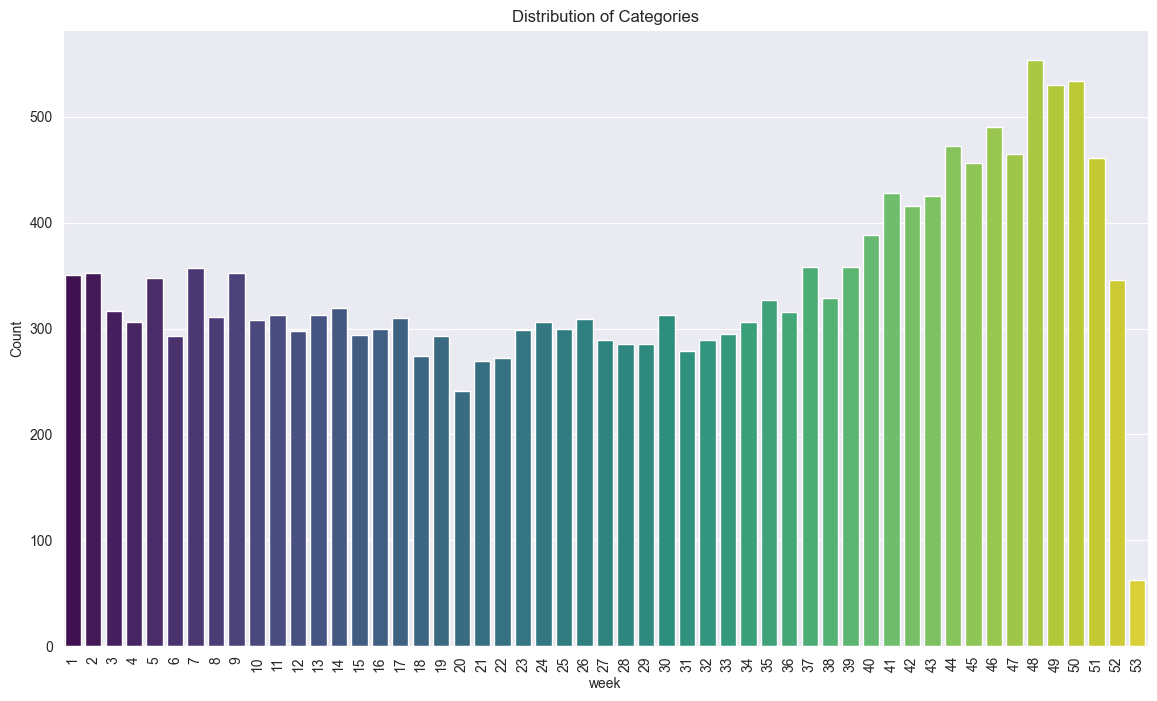

In [18]:
category_counts = train_df['week_caught'].value_counts()

# Plotting using seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('week')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.show()

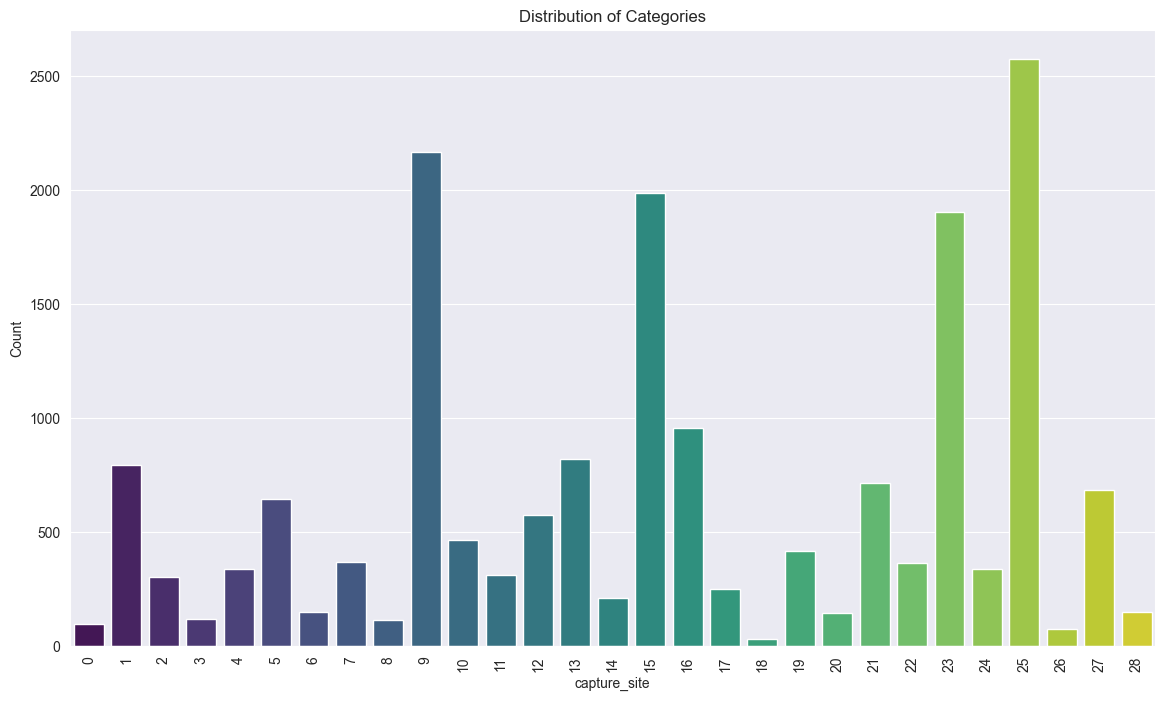

In [19]:
category_counts = train_df['capture_site'].value_counts()

# Plotting using seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('capture_site')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.show()

In [20]:
train_df

,rescue_id,researcher,capture_site,foraging_ground,capture_method,fisher,landing_site,species,tag_1,tag_2,...,ccw_cm,weight_kg,sex,turtle_characteristics,status,release_site,year_caught,week_caught,year_release,week_release
0,2000_RE_0060,25,0,Ocean,Net,1072,LandingSite_CaptureSiteCategory_2,6,CC00147,NaN,...,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,2000,51,2000.0,51
1,2001_RE_0187,6,0,Ocean,Net,520,LandingSite_CaptureSiteCategory_2,6,W442,NaN,...,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,2001,43,2001.0,43
2,2001_RE_0197,6,0,Ocean,Net,1669,LandingSite_CaptureSiteCategory_2,5,KE0376,NaN,...,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,2001,44,2001.0,2
3,2002_RE_0031,32,0,Ocean,Net,1798,LandingSite_CaptureSiteCategory_2,6,CC00302,NaN,...,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,2002,11,2002.0,44
4,2002_RE_0118,25,0,Ocean,Beached,1918,LandingSite_CaptureSiteCategory_2,5,NotTagged_0113,NaN,...,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,2002,32,2002.0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18057,2018_RE_1511,30,9,Ocean,Net,569,LandingSite_CaptureSiteCategory_1,5,KES1828,NaN,...,50.57,21.09,Unknown,White calcareous algae on carapace,Released,ReleaseSite_68,2018,51,2018.0,51
18058,2018_RE_1514,30,9,Ocean,Net,125,LandingSite_CaptureSiteCategory_1,6,KES0563,NaN,...,38.37,9.02,Unknown,Calcareous + green algae on carapace\nBarnacle...,Released,ReleaseSite_68,2018,51,2018.0,51
18059,2018_RE_1532,30,9,Ocean,Net,1343,LandingSite_CaptureSiteCategory_1,5,KES1833,NaN,...,52.30,NaN,Unknown,Clean turtle,Released,ReleaseSite_68,2018,52,2018.0,52
18060,2018_RE_1533,30,9,Ocean,Net,1551,LandingSite_CaptureSiteCategory_1,5,KES1831,NaN,...,48.50,NaN,Unknown,Green algae on carapace\ntip of left supra mis...,Released,ReleaseSite_68,2018,52,2018.0,52


In [21]:
train_df.nunique()

rescue_id                 18062
researcher                   35
capture_site                 29
foraging_ground               3
capture_method               15
fisher                     2085
landing_site                  5
species                       8
tag_1                      8235
tag_2                       246
lost_tags                   167
t_number                     38
ccl_cm                     1338
ccw_cm                     1262
weight_kg                  1937
sex                           4
turtle_characteristics    16342
status                      439
release_site                271
year_caught                  21
week_caught                  53
year_release                 22
week_release                 53
dtype: int64

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rescue_id               18062 non-null  object 
 1   researcher              18062 non-null  int64  
 2   capture_site            18062 non-null  int64  
 3   foraging_ground         18062 non-null  object 
 4   capture_method          18062 non-null  object 
 5   fisher                  18062 non-null  int64  
 6   landing_site            18062 non-null  object 
 7   species                 18062 non-null  int64  
 8   tag_1                   17937 non-null  object 
 9   tag_2                   4911 non-null   object 
 10  lost_tags               925 non-null    object 
 11  t_number                38 non-null     object 
 12  ccl_cm                  18038 non-null  float64
 13  ccw_cm                  18035 non-null  float64
 14  weight_kg               12653 non-null

In [23]:
df = train_df.groupby('Status').size().reset_index(name='Size')
df.sort_values('Size', ascending= False).head(60)



KeyError: 'Status'

In [ ]:
#We want to start the 

train_df.query('Date_TimeRelease.isna()')

In [ ]:
train_df[['Lost_Tags', 'Tag_1', 'Tag_2','Rescue_ID' ,'Date_TimeCaught']].query('Tag_1.isna() and Tag_2.isna() and Lost_Tags.isna()')

In [ ]:
# Change the fisher to just a fisher ID, Same for Researcher

df = train_df.groupby('Researcher').size().reset_index(name='Size')
df.sort_values('Size', ascending= False).head(60)


In [ ]:
# Build in a function using apply to convert the date to Week calender

In [ ]:
#We can drop the column Sex, since the most values are Unknown 
df = train_df.groupby('Sex').size().reset_index(name='Size')
df.sort_values('Size', ascending= False).head(60)


In [28]:
import sklearn.linear_model 

In [29]:
linear_regression = linear_model.LinearRegression()

NameError: name 'linear_model' is not defined

In [31]:
train_df = train_df.groupby(['capture_site', 'week_caught']).size()
train_df = train_df.reset_index(name='rescue_count')


In [37]:
rescue_counts = train_df.groupby(['capture_site', 'week_caught']).size().reset_index(name='rescue_count')
train_df = pd.merge(train_df, rescue_counts, on=['capture_site', 'week_caught'], how='left')

In [38]:
y = train_df['rescue_count']

In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rescue_id               18062 non-null  object 
 1   researcher              18062 non-null  int64  
 2   capture_site            18062 non-null  int64  
 3   foraging_ground         18062 non-null  object 
 4   capture_method          18062 non-null  object 
 5   fisher                  18062 non-null  int64  
 6   landing_site            18062 non-null  object 
 7   species                 18062 non-null  int64  
 8   tag_1                   17937 non-null  object 
 9   tag_2                   4911 non-null   object 
 10  lost_tags               925 non-null    object 
 11  t_number                38 non-null     object 
 12  ccl_cm                  18038 non-null  float64
 13  ccw_cm                  18035 non-null  float64
 14  weight_kg               12653 non-null

In [45]:
X.isna().sum()

researcher         0
fisher             0
species            0
ccl_cm            24
ccw_cm            27
weight_kg       5409
year_caught        0
week_caught        0
year_release    6573
week_release    6573
dtype: int64

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Split the data into training and testing sets (optional)
columns_to_drop = ['rescue_id', 'capture_site', 'turtle_characteristics', 'tag_1', 'tag_2', 'lost_tags', 't_number', 'sex', 'status', 'rescue_count', 'foraging_ground', 'capture_method', 'landing_site', 'status', 'release_site', 'week_release', 'year_release', 'weight_kg', 'ccl_cm', 'ccw_cm']

X = train_df.drop(columns=columns_to_drop)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Optionally, make predictions
y_pred = model.predict(X_test)

# Optionally, evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 404.4649820588037


In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# Compute regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error: 16.759564070122977
Mean Squared Error: 404.4649820588037
Root Mean Squared Error: 20.111314776980734
R-squared (R2): 0.08606830754341432
